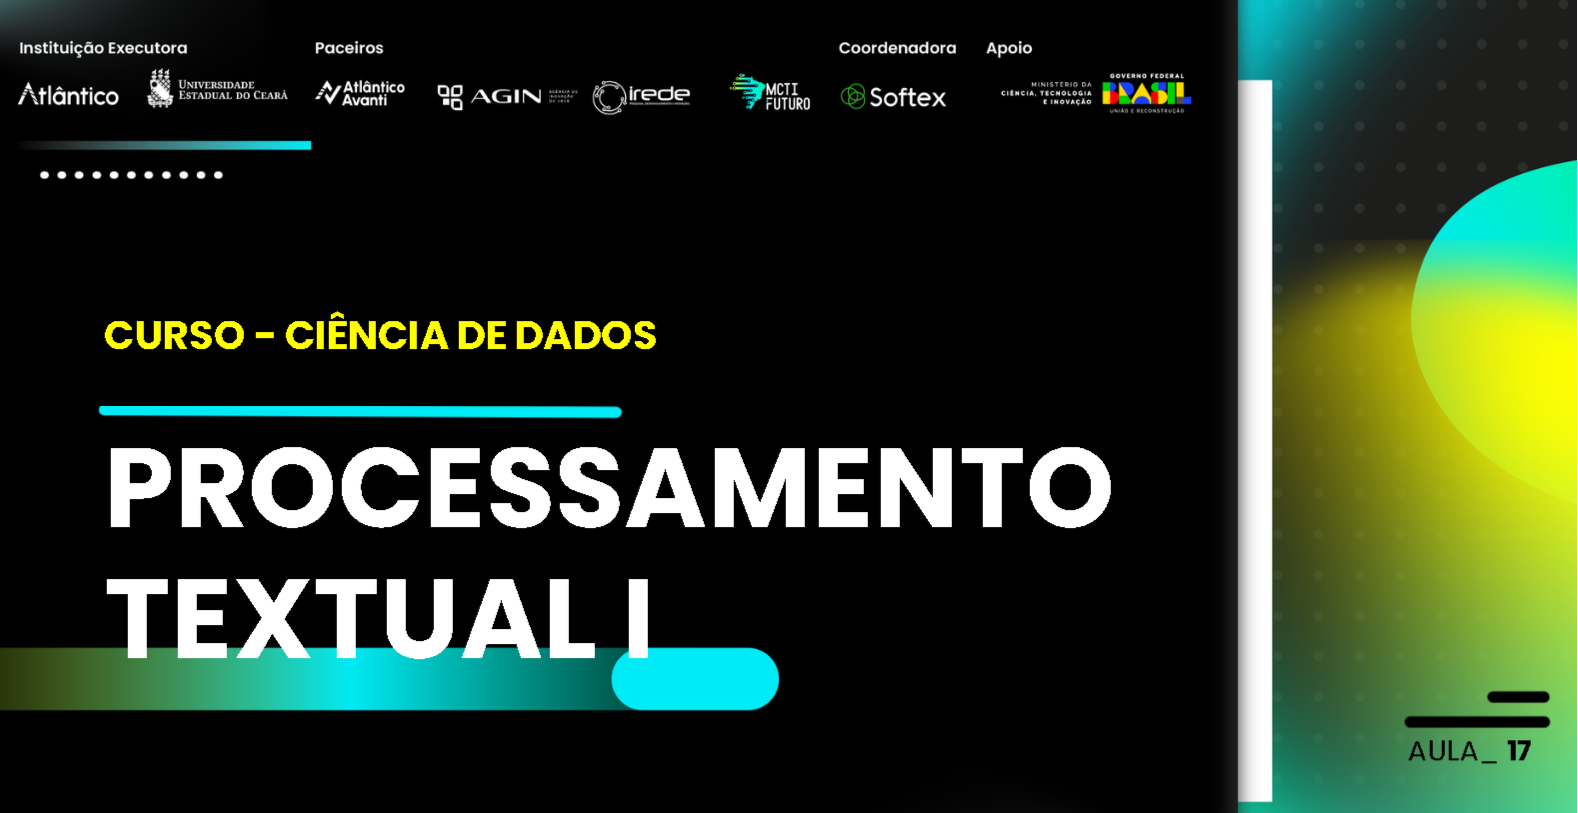


### **Atividade Prática: Introdução ao Processamento de Linguagem Natural (NLP)**  

#### **Objetivos da Atividade**  
1. Compreender os conceitos fundamentais do Processamento de Linguagem Natural (NLP).  
2. Aplicar técnicas de pré-processamento de texto, incluindo remoção de stopwords, stemming e lematização.  
3. Explorar e comparar diferentes representações de texto (Bag of Words e TF-IDF).  
4. Desenvolver modelos de classificação de sentimentos e comparar métricas de desempenho.  

#### **Sumário**  
1. Introdução ao NLP.  
2. Importação das bibliotecas necessárias.  
3. Baixar os datasets de NLP.  
4. Análise do dataset e descrição.  
5. Expressões regulares para limpeza de texto.  
6. Remoção de stopwords.  
7. Lemmatização e Stemming (com tabela comparativa).  
8. Representação de texto com Bag of Words.  
9. Representação de texto com TF-IDF.  
10. Classificação de sentimentos.  
  

---

### **1) Introdução ao NLP**  
O Processamento de Linguagem Natural (NLP) é uma subárea da Inteligência Artificial que busca criar sistemas capazes de entender, interpretar e gerar texto ou fala em linguagem humana.  

Aplicações comuns de NLP incluem:  
- Análise de sentimentos.  
- Tradução automática.  
- Resumo de texto.  
- Sistemas de busca.  
- Assistentes virtuais.  




### **2) Importação das bibliotecas necessárias**  


In [ ]:
!python -m spacy download pt_core_news_sm

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import pandas as pd
import random
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### **3) Dataset sintético para classificação de sentimentos**  
Utilizaremos um dataset sintético em português com dados de sentimentos. Este consiste em reviews de produtos, onde cada texto é rotulado com um sentimento: positivo ou negativo. Esta tarefa é uma **classificação supervisionada**, pois usamos os rótulos (variável dependente) para treinar e avaliar o modelo.

**Descrição das variáveis**:  
- `review`: texto contendo a opinião do usuário.  
- `sentiment`: rótulo associado à opinião (positivo = 1, negativo = 0).  



In [ ]:
# Expansão das listas de frases positivas e negativas
frases_positivas_treino = [
    "Adorei o produto! #satisfeito", "Excelente qualidade, recomendo! @lojaTop",
    "Superou minhas expectativas! Veja em https://produto.com/top",
    "Muito bom, chegou antes do prazo. #ótimaCompra",
    "Gostei bastante, produto perfeito. Obrigado @vendedor!",
    "Ótima experiência de compra. #Recomendo",
    "Funciona perfeitamente, estou muito satisfeito. Veja mais: https://review.com/produto",
    "Produto incrível, muito útil! @superLoja",
    "Chegou em perfeito estado e adorei. #Top",
    "Com certeza compraria novamente! Veja aqui: https://loja.com/perfeito",
    "Entrega rápida e eficiente. #rapidez",
    "Valeu muito a pena, recomendo! Confira @lojaBoa",
    "Produto cumpre o prometido. Veja em https://produto.com",
    "A embalagem estava impecável, nota 10. #embalagemTop",
    "Compra maravilhosa, super satisfeita! #Maravilhoso",
    "Atendimento incrível, me ajudaram muito. @AtendimentoPro",
    "Sem dúvidas, a melhor compra do ano! Veja: https://compras.com/melhor",
    "Estou impressionado com a qualidade. #QualidadeImpressionante",
    "Chegou antes do prazo e é tudo que eu precisava. #EntregaPerfeita",
    "Melhor custo-benefício, recomendo a todos! #custoBeneficio",
    "Incrível como o produto é eficiente. Confira: https://produto.com/eficiencia",
    "A equipe está de parabéns pelo serviço. @EquipeTop",
    "Produto fantástico, mudou minha rotina. Veja mais: https://produto.com/fantastico",
    "Superou todas as expectativas, parabéns @LojaBoa! #Top",
    "Recomendo para amigos e familiares, é excelente! #Recomendo"
]

frases_positivas_teste = [
    "A loja é excelente, tudo perfeito! #topLoja",
    "Adorei a embalagem, muito cuidadosa. @embalagemPro",
    "Recomendo sem dúvidas, ótimo serviço. Veja: https://servico.com/otimo",
    "Tudo veio conforme descrito, muito bom. #Confiável",
    "Ficou perfeito para o que eu precisava. #Perfeito",
    "O presente foi um sucesso! Obrigado @lojaPresente",
    "Muito melhor do que eu esperava. Confira mais: https://produto.com/incrivel",
    "Parabéns pelo ótimo atendimento! #obrigado",
    "Estou muito feliz com a compra! #feliz",
    "Material de ótima qualidade. #qualidade",
    "Fiquei impressionado com a qualidade. @marcaTop",
    "Compra totalmente satisfatória. Confira: https://compra.com/satisfeito",
    "Chegou rápido e o atendimento foi excelente. #RapidezEficiente",
    "Melhor loja que já comprei, tudo perfeito. @LojaTop",
    "O produto é tão bom que comprei mais um! #ProdutoTop",
    "Recomendo para qualquer pessoa que procure qualidade. @QualidadeBoa",
    "Vale cada centavo, produto de primeira. #Recomendo",
    "Ótima solução para minhas necessidades. Veja: https://produto.com/solucao",
    "Me surpreendeu em todos os aspectos. @LojaIncrivel",
    "Não esperava tanto, mas foi maravilhoso. #MaravilhosoExtra"
]

frases_negativas_treino = [
    "Produto horrível, não recomendo. #decepção", "Péssima experiência, muito ruim. @lojaRuim",
    "Chegou quebrado, total decepção. Veja: https://produto.com/quebrado",
    "Material de qualidade muito baixa. #ruim",
    "Não funciona como descrito, muito insatisfeito. Veja: https://review.com/insatisfeito",
    "Entrega atrasada, serviço ruim. #atraso",
    "Produto caro e de má qualidade. Veja @lojaCara",
    "Não gostei, nunca mais compro aqui. #péssimo",
    "Descrição enganosa, perdi dinheiro. Veja mais: https://enganoso.com",
    "Horrível, arrependido da compra. @lojaPéssima",
    "Experiência frustrante, não recomendo. #frustração",
    "Produto veio errado, muito descaso. Veja @suporteRuim",
    "Produto não entregou o que prometia, fiquei insatisfeito. #promessaFalsa",
    "Paguei caro e recebi algo muito inferior. Veja mais: @DescontoRuim",
    "Reclamei com o suporte e não me ajudaram. #SuportePéssimo",
    "É uma fraude, tomem cuidado. Veja: https://fraude.com",
    "Muito abaixo das expectativas. @ExpectativaRuim",
    "Entrega demorou semanas, total descaso. #AtrasoEntrega",
    "O produto veio com defeito e não funciona. #DefeitoProduto",
    "Não recomendo, foi uma experiência frustrante. Veja: https://frustrante.com"
]

frases_negativa_teste = [
    "Foi uma completa perda de tempo. Veja mais: https://perda.com",
    "O suporte da loja é péssimo. #suporteRuim",
    "Infelizmente não funcionou nada. Veja: https://produto.com/nãoFunciona",
    "Muito frágil, quebrou no primeiro uso. @produtoRuim",
    "Chegou sujo e mal embalado. #péssimo",
    "A descrição era completamente falsa. @falsidade",
    "Muito caro pelo que oferece. Veja: https://custo.com/alto",
    "Não atendeu as minhas expectativas. @lojaDecepcionante",
    "Infelizmente foi uma péssima compra. Veja: https://péssimo.com",
    "Não vale o preço pago. #caro",
    "Não comprem, é uma armadilha. Veja: https://cuidado.com",
    "Decepcionante, esperava mais. @compraRuim",
    "A qualidade é extremamente ruim. #ruim",
    "Produto com prazo de validade vencido. @ProblemaProduto",
    "Recebi algo completamente diferente do anunciado. Veja mais: https://enganoso.com",
    "O produto parou de funcionar após um dia de uso. #DurabilidadeRuim",
    "Muito caro e a qualidade não corresponde. @CustoBeneficioRuim",
    "Nunca mais compro dessa loja, foi decepcionante. #LojaRuim",
    "As especificações são totalmente falsas. Veja: https://produto.com/mentira",
    "Me arrependi completamente da compra. @Arrependimento"
]



### **Geraçaõ do conjunto de Treino**  

In [ ]:

# Função para gerar combinações de frases
def gerar_review(frases, num_frases=4):
    return " ".join(random.sample(frases, num_frases))

# Gerar exemplos sintéticos
reviews_train = []
sentiments_train = []

# Gerar 250 exemplos positivos
for _ in range(200):
    reviews_train.append(gerar_review(frases_positivas_treino, random.randint(1, 4)))  # Combina 1 a 5 frases positivas
    sentiments_train.append(1)

# Gerar 250 exemplos negativos
for _ in range(200):
    reviews_train.append(gerar_review(frases_negativas_treino, random.randint(1, 4)))  # Combina 1 a 5 frases negativas
    sentiments_train.append(0)

# Misturar os exemplos
data_treino = pd.DataFrame({'review': reviews_train, 'sentiment': sentiments_train}).sample(frac=1).reset_index(drop=True)

# Exibir as primeiras linhas do dataset
data_treino


,review,sentiment
0,"Excelente qualidade, recomendo! @lojaTop Com c...",1
1,Paguei caro e recebi algo muito inferior. Veja...,0
2,"Chegou quebrado, total decepção. Veja: https:/...",0
3,"Não recomendo, foi uma experiência frustrante....",0
4,"Atendimento incrível, me ajudaram muito. @Aten...",1
...,...,...
395,Material de qualidade muito baixa. #ruim Recla...,0
396,"Péssima experiência, muito ruim. @lojaRuim",0
397,"Não gostei, nunca mais compro aqui. #péssimo M...",0
398,Entrega rápida e eficiente. #rapidez Sem dúvid...,1


### **Geraçaõ do conjunto de Teste**  

In [ ]:
# Gerar exemplos sintéticos
reviews_test = []
sentiments_test = []

# Gerar 250 exemplos positivos
for _ in range(150):
    reviews_test.append(gerar_review(frases_positivas_teste, random.randint(1, 4)))  # Combina 1 a 5 frases positivas
    sentiments_test.append(1)

# Gerar 250 exemplos negativos
for _ in range(150):
    reviews_test.append(gerar_review(frases_negativa_teste, random.randint(1, 4)))  # Combina 1 a 5 frases negativas
    sentiments_test.append(0)

# Misturar os exemplos
data_test = pd.DataFrame({'review': reviews_test, 'sentiment': sentiments_test}).sample(frac=1).reset_index(drop=True)

# Exibir as primeiras linhas do dataset
data_test

,review,sentiment
0,A qualidade é extremamente ruim. #ruim A descr...,0
1,A qualidade é extremamente ruim. #ruim,0
2,O produto parou de funcionar após um dia de us...,0
3,O produto é tão bom que comprei mais um! #Prod...,1
4,Ótima solução para minhas necessidades. Veja: ...,1
...,...,...
295,Muito caro e a qualidade não corresponde. @Cus...,0
296,A qualidade é extremamente ruim. #ruim O produ...,0
297,Foi uma completa perda de tempo. Veja mais: ht...,0
298,Ótima solução para minhas necessidades. Veja: ...,1


In [ ]:
# Análise de distribuição
print("\nDistribuição de classes:")
data_treino['sentiment'].value_counts()




Distribuição de classes:


,count
sentiment,
1,200
0,200


In [ ]:
# Análise de distribuição
print("\nDistribuição de classes:")
data_test['sentiment'].value_counts()


Distribuição de classes:


,count
sentiment,
0,150
1,150


### **5) Expressões Regulares para Limpeza de Texto**  

As expressões regulares (Regex) são ferramentas poderosas para identificar padrões em textos. Durante o pré-processamento, são usadas para:  
1. Remover links, hashtags e menções.  
2. Substituir caracteres especiais e números.  
3. Uniformizar o texto (ex.: converter para minúsculas).

**Fórmulas e exemplos**:  
- Para remover URLs: `re.sub(r"http\S+", "", texto)`  
- Para remover números: `re.sub(r"\d+", "", texto)`  



| **Expressão Regular** | **Descrição** | **Exemplo** |
|-----------------------|---------------|-------------|
| `\d`                  | Qualquer dígito (0-9) | `'123'.match(r'\d')` (True) |
| `\D`                  | Qualquer caractere que não seja dígito | `'a'.match(r'\D')` (True) |
| `\w`                  | Qualquer caractere alfanumérico (letras, números e _) | `'abc123'.match(r'\w')` (True) |
| `\W`                  | Qualquer caractere que não seja alfanumérico | `'@'.match(r'\W')` (True) |
| `\s`                  | Espaço em branco, incluindo espaços, tabs e novas linhas | `' '.match(r'\s')` (True) |
| `\S`                  | Qualquer caractere que não seja espaço em branco | `'a'.match(r'\S')` (True) |
| `^`                   | Início da string | `re.match(r'^a', 'abc')` (True) |
| `$`                   | Fim da string | `re.match(r'abc$', 'abc')` (True) |
| `.`                   | Qualquer caractere, exceto nova linha | `'a'.match(r'.')` (True) |
| `*`                   | Zero ou mais repetições do padrão anterior | `'aaaa'.match(r'a*')` (True) |
| `+`                   | Uma ou mais repetições do padrão anterior | `'aaa'.match(r'a+')` (True) |
| `?`                   | Zero ou uma repetição do padrão anterior | `'a'.match(r'a?')` (True) |
| `{n}`                 | Exatamente n repetições do padrão anterior | `'aaa'.match(r'a{3}')` (True) |
| `{n,}`                | Pelo menos n repetições do padrão anterior | `'aaaa'.match(r'a{3,}')` (True) |
| `{n,m}`               | Entre n e m repetições do padrão anterior | `'aabb'.match(r'a{2,3}')` (True) |
| `[]`                  | Conjunto de caracteres | `'a'.match(r'[abc]')` (True) |
| `|`                   | Ou | `'a'.match(r'a|b')` (True) |
| `()`                  | Agrupamento de padrões | `re.match(r'(abc)+', 'abcabc')` (True) |
| `\b`                  | Limite de palavra | `'abc'.match(r'\babc\b')` (True) |
| `\B`                  | Não-limite de palavra | `'abc'.match(r'\Babc\B')` (False) |



In [ ]:

# Função de limpeza
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)    # Remove menções
    text = re.sub(r"#\w+", "", text)    # Remove hashtags
    text = re.sub(r"[^a-zA-Záéíóúçãõ ]", " ", text)  # Remove caracteres especiais
    text = text.lower()  # Converte para minúsculas
    return text

data_treino['cleaned_review'] = data_treino['review'].apply(clean_text)
data_treino[['review', 'cleaned_review']]


,review,cleaned_review
0,"Excelente qualidade, recomendo! @lojaTop Com c...",excelente qualidade recomendo com certeza c...
1,Paguei caro e recebi algo muito inferior. Veja...,paguei caro e recebi algo muito inferior veja...
2,"Chegou quebrado, total decepção. Veja: https:/...",chegou quebrado total decepção veja produt...
3,"Não recomendo, foi uma experiência frustrante....",não recomendo foi uma experi ncia frustrante ...
4,"Atendimento incrível, me ajudaram muito. @Aten...",atendimento incrível me ajudaram muito func...
...,...,...
395,Material de qualidade muito baixa. #ruim Recla...,material de qualidade muito baixa reclamei c...
396,"Péssima experiência, muito ruim. @lojaRuim",péssima experi ncia muito ruim
397,"Não gostei, nunca mais compro aqui. #péssimo M...",não gostei nunca mais compro aqui material ...
398,Entrega rápida e eficiente. #rapidez Sem dúvid...,entrega rápida e eficiente sem dúvidas a me...


In [ ]:
data_test['cleaned_review'] = data_test['review'].apply(clean_text)
data_test[['review', 'cleaned_review']]

,review,cleaned_review
0,A qualidade é extremamente ruim. #ruim A descr...,a qualidade é extremamente ruim a descrição ...
1,A qualidade é extremamente ruim. #ruim,a qualidade é extremamente ruim
2,O produto parou de funcionar após um dia de us...,o produto parou de funcionar após um dia de us...
3,O produto é tão bom que comprei mais um! #Prod...,o produto é tão bom que comprei mais um muit...
4,Ótima solução para minhas necessidades. Veja: ...,tima solução para minhas necessidades veja ...
...,...,...
295,Muito caro e a qualidade não corresponde. @Cus...,muito caro e a qualidade não corresponde não...
296,A qualidade é extremamente ruim. #ruim O produ...,a qualidade é extremamente ruim o produto pa...
297,Foi uma completa perda de tempo. Veja mais: ht...,foi uma completa perda de tempo veja mais n...
298,Ótima solução para minhas necessidades. Veja: ...,tima solução para minhas necessidades veja ...



### **6) Remoção de Stopwords**  

Stopwords são palavras frequentes (como "de", "a", "e") que normalmente não carregam informações úteis para o modelo.  

A remoção de stopwords reduz a dimensionalidade do texto e ajuda a focar em palavras mais relevantes.  


---

In [ ]:

# Stopwords em português
stop_words = set(stopwords.words('portuguese'))

# Remover "não" da lista de stopwords
stop_words.discard("não")

def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    return " ".join([word for word in words if word not in stop_words])

data_treino['no_stopwords'] = data_treino['cleaned_review'].apply(remove_stopwords)
data_treino[['cleaned_review', 'no_stopwords']]



,cleaned_review,no_stopwords
0,excelente qualidade recomendo com certeza c...,excelente qualidade recomendo certeza comprari...
1,paguei caro e recebi algo muito inferior veja...,paguei caro recebi algo inferior veja
2,chegou quebrado total decepção veja produt...,chegou quebrado total decepção veja produto nã...
3,não recomendo foi uma experi ncia frustrante ...,não recomendo experi ncia frustrante veja não ...
4,atendimento incrível me ajudaram muito func...,atendimento incrível ajudaram funciona perfeit...
...,...,...
395,material de qualidade muito baixa reclamei c...,material qualidade baixa reclamei suporte não ...
396,péssima experi ncia muito ruim,péssima experi ncia ruim
397,não gostei nunca mais compro aqui material ...,não gostei nunca compro aqui material qualidad...
398,entrega rápida e eficiente sem dúvidas a me...,entrega rápida eficiente dúvidas melhor compra...


In [ ]:
data_test['no_stopwords'] = data_test['cleaned_review'].apply(remove_stopwords)
data_test[['cleaned_review', 'no_stopwords']]

,cleaned_review,no_stopwords
0,a qualidade é extremamente ruim a descrição ...,qualidade extremamente ruim descrição completa...
1,a qualidade é extremamente ruim,qualidade extremamente ruim
2,o produto parou de funcionar após um dia de us...,produto parou funcionar após dia uso caro ofer...
3,o produto é tão bom que comprei mais um muit...,produto tão bom comprei melhor esperava confir...
4,tima solução para minhas necessidades veja ...,tima solução necessidades veja compra totalmen...
...,...,...
295,muito caro e a qualidade não corresponde não...,caro qualidade não corresponde não vale preço ...
296,a qualidade é extremamente ruim o produto pa...,qualidade extremamente ruim produto parou func...
297,foi uma completa perda de tempo veja mais n...,completa perda tempo veja não comprem armadilh...
298,tima solução para minhas necessidades veja ...,tima solução necessidades veja compra totalmen...


### **7) Lemmatização e Stemming**  

- **Stemming**: Reduz as palavras à sua raiz, sem considerar o significado. (Ex.: "correr", "correu" → "corr").  
- **Lemmatização**: Reduz as palavras à forma base considerando seu contexto gramatical. (Ex.: "correu" → "correr").  


In [ ]:
nlp = spacy.load('pt_core_news_sm')
# Função de Stemming
def stemming(text):
    stemmer = RSLPStemmer()
    words = word_tokenize(text, language='portuguese')
    return " ".join([stemmer.stem(word) for word in words])

# Função de Lemmatization
def lemmatization(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

data_treino['Stemmed'] = data_treino['no_stopwords'].apply(stemming)
data_treino['Lemmatized'] = data_treino['no_stopwords'].apply(lemmatization)

data_treino[['no_stopwords','Lemmatized','Stemmed']].head()


,no_stopwords,Lemmatized,Stemmed
0,excelente qualidade recomendo certeza comprari...,excelente qualidade recomendo certeza comprar ...,excel qual recom cert compr nov vej aqu
1,paguei caro recebi algo inferior veja,paguei caro recebi algo inferior ver,pag car receb alg inferi vej
2,chegou quebrado total decepção veja produto nã...,chegar quebrar total decepção ver produto não ...,cheg quebr total decepç vej produt não entreg ...
3,não recomendo experi ncia frustrante veja não ...,não recomendar experi nciar frustrante ver não...,não recom exper nci frustr vej não func descri...
4,atendimento incrível ajudaram funciona perfeit...,atendimento incrível ajudar funcionar perfeita...,atend incr ajud func perfeit satisfeit vej mel...


In [ ]:
data_test['Stemmed'] = data_test['no_stopwords'].apply(stemming)
data_test['Lemmatized'] = data_test['no_stopwords'].apply(lemmatization)

data_test[['no_stopwords','Lemmatized','Stemmed']].head()



,no_stopwords,Lemmatized,Stemmed
0,qualidade extremamente ruim descrição completa...,qualidade extremamente ruim descrição completa...,qual extrem ruim descr complet fals car qual n...
1,qualidade extremamente ruim,qualidade extremamente ruim,qual extrem ruim
2,produto parou funcionar após dia uso caro ofer...,produto parar funcionar após dia uso caro ofer...,produt par funcion após dia uso car oferec vej...
3,produto tão bom comprei melhor esperava confir...,produto tão bom comprar melhor esperar confira...,produt tão bom compr melhor esper conf melhor ...
4,tima solução necessidades veja compra totalmen...,timar solução necessidade ver compra totalment...,tim soluç necess vej compr total satisfatór conf


### **8) Representação de Texto com Bag of Words**  
**Fundamentação Teórica**:  
O modelo **Bag of Words (BoW)** cria uma matriz de frequências de palavras.  

Seja um conjunto $( D )$ com $( n )$ documentos e $( m )$ termos:  
- Elemento $( A[i][j] )$ indica a frequência do termo $( j )$ no documento $( i)$.  



In [ ]:

cv = CountVectorizer()
X_cv = cv.fit_transform(data_treino['no_stopwords'])

print("Shape da matriz:", X_cv.shape)
print("Exemplo de matriz:",)
X_cv.toarray()[:5]


Shape da matriz: (400, 105)
Exemplo de matriz:


array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0

### **9) Representação de Texto com TF-IDF**  

A técnica **TF-IDF** atribui peso maior a termos relevantes e menos frequentes em um conjunto de texto.  





In [ ]:

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(data_treino['no_stopwords'])

print("Shape da matriz:", X_tfidf.shape)
print("Exemplo de matriz:")
X_tfidf.toarray()[:5]


Shape da matriz: (400, 105)
Exemplo de matriz:


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.34851639, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.43430679, 0.        , 0.        , 0.43430679,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.3820052 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.43430679,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  


### **10) Classificação de Sentimentos**  

Uma tarefa importante em Processamento de Linguagem Natural (NLP) que visa identificar a atitude emocional expressa em um texto. Em geral, a classificação de sentimentos envolve a categorização de opiniões ou reviews em rótulos como **positivo**, **negativo** ou **neutro**. No contexto desta atividade, o objetivo é classificar reviews de produtos como **positivos** ou **negativos**.

A regressão logística foi escolhida como modelo para essa tarefa devido à sua simplicidade, eficiência e capacidade de lidar bem com tarefas de classificação binária, como esta.

##### **Desafios da Classificação de Sentimentos com Regressão Logística**
Embora a regressão logística seja uma boa escolha para tarefas de classificação binária, ela pode não capturar completamente as dependências mais complexas no texto, como as interações entre palavras em frases mais longas ou o contexto em que as palavras são usadas. Isso pode ser uma limitação quando se lida com textos mais complicados ou quando a relação entre as características e o sentimento não é linear.

##### **Avaliação do Modelo**
Para avaliar a performance do modelo de regressão logística, é fundamental utilizar métricas adequadas. Como o problema é de classificação binária, as principais métricas incluem:
- **Acurácia:** A proporção de classificações corretas em relação ao total de classificações.
- **Precisão e Recall:** Importantes quando se busca minimizar erros de classificação em uma das classes, como por exemplo, evitar a classificação incorreta de reviews positivas como negativas.
- **F1-Score:** A média harmônica entre precisão e recall, útil para avaliar o equilíbrio entre esses dois aspectos.
- **Matriz confusão:** permite indenticar a exata quantidade de Falsos Positivos, Falsos negativos e Verdadeios positivos.



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       150
           1       0.88      0.92      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



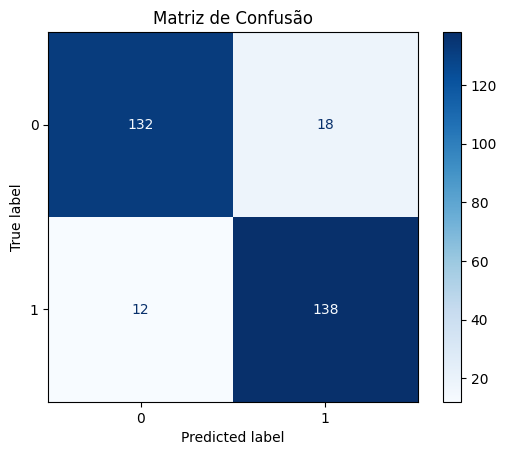

In [ ]:
# Separar features (X) e rótulos (y)
X_train = data_treino['review']
y_train = data_treino['sentiment']

X_test = data_test['review']
y_test = data_test['sentiment']

# Vetorização usando CountVectorizer
vectorizer = CountVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modelo de classificação
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Previsões
y_pred = model.predict(X_test_tfidf)

# Relatório de classificação
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()


#### **10.1) Classificação de Sentimentos com pré-processamento Stemming**

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       150
           1       0.85      0.93      0.89       150

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



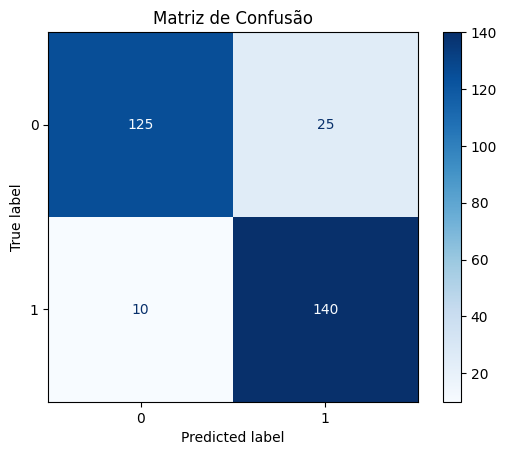

In [ ]:
# Separar features (X) e rótulos (y)
X_train = data_treino['Stemmed']
y_train = data_treino['sentiment']

X_test = data_test['Stemmed']
y_test = data_test['sentiment']

# Vetorização usando CountVectorizer
vectorizer = CountVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modelo de classificação
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Previsões
y_pred = model.predict(X_test_tfidf)

# Relatório de classificação
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()


#### **10.2) Classificação de Sentimentos com pré-processamento e TF-IDF**

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       150
           1       0.89      0.96      0.93       150

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



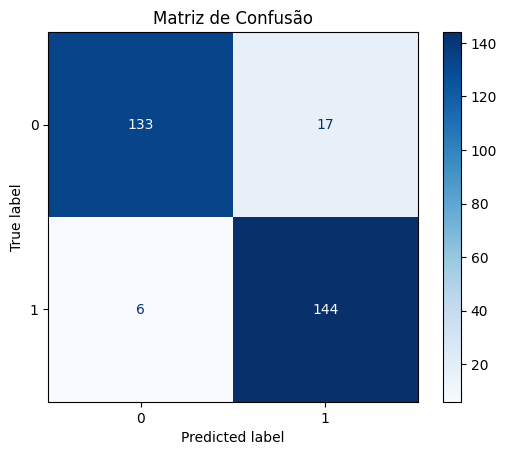

In [ ]:

# Vetorização usando TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modelo de classificação
# model = MultinomialNB()
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Previsões
y_pred = model.predict(X_test_tfidf)

# Relatório de classificação
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()
